In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns

In [118]:
data = pd.read_csv("/home/engineer/Kaggle_dataset/Titanic/train.csv")
data_test = pd.read_csv("/home/engineer/Kaggle_dataset/Titanic/test.csv")

In [119]:
print(data.describe())
print(data.columns)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
      

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'surname'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
title           object
surname         object
dtype: object


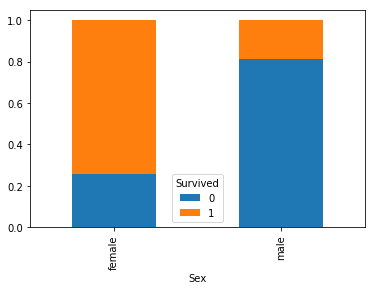

In [128]:
#print(data.head())

data.Parch.value_counts()
print(data.columns)
print(data.dtypes)

len(data.Sex[data.Survived == 1][data.Sex=='female'])
sex_survive = pd.crosstab(data.Sex,data.Survived)
#more females survived 
sex_survive.div(sex_survive.sum(1), axis=0).plot(kind="bar", stacked=True)

80.0 0.42 29.69911764705882 nan
age less than 10  ---  62


/home/engineer/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


177

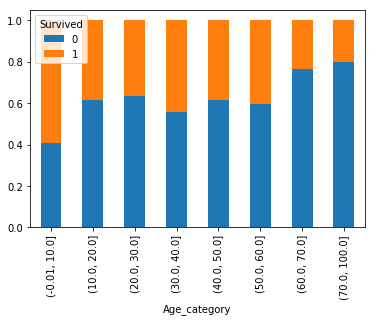

In [129]:

print(max(data.Age), min(data.Age), np.mean(data.Age), np.median(data.Age))
sum(data.Age.isnull())
data.Age.mode()[0]

#print(sum(temp_age.isnull()))
age_groups = [-0.01,10,20,30,40,50,60,70,100]
labels = ['adolescents', 'midde_aged', 'very_old' ]

data['Age_category'] = pd.cut(data.Age, bins=age_groups)
temp_age = pd.crosstab(data.Age_category, data.Survived)
temp_age.div(temp_age.sum(1), axis=0).plot(kind='bar', stacked =True)

print("age less than 10  --- ", len(data[data.Age < 10]))

sum(data.Age_category.isnull())

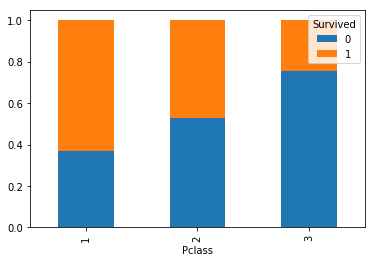

In [130]:
data.columns
pclass_surv = pd.crosstab(data.Pclass, data.Survived)
pclass_surv.div(pclass_surv.sum(1), axis= 0 ).plot(kind = 'bar', stacked = True)
#more people in 1st class survived than other classes


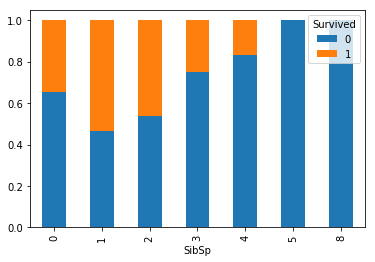

In [131]:
data.columns
data.SibSp.unique()
sibsp_surv = pd.crosstab(data.SibSp, data.Survived)
sibsp_surv.div(sibsp_surv.sum(1), axis = 0).plot(kind='bar', stacked = True)

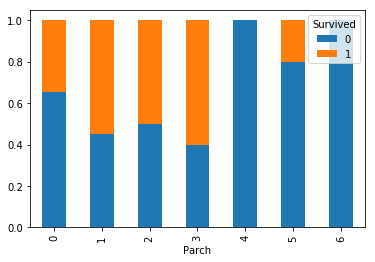

In [132]:
data.columns
len(data.Parch.unique())
parch_surv = pd.crosstab(data.Parch, data.Survived)
parch_surv.div(parch_surv.sum(1), axis = 0).plot(kind='bar', stacked = True)

512.3292 0.0 32.2042079685746


9

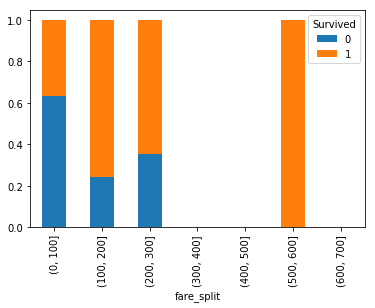

In [133]:
data.columns

print(max(data.Fare), min(data.Fare), np.mean(data.Fare))
bins = [0,100,200,300,400,500,600,700]
data['fare_split'] = pd.cut(data.Fare, bins=bins)
fare_surv = pd.crosstab(data.fare_split, data.Survived)
fare_surv.div(fare_surv.sum(1), axis = 0).plot(kind='bar', stacked = True)
len(data[data.Fare >250]) 


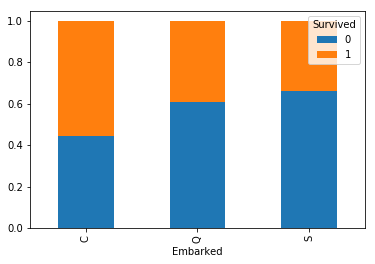

In [134]:
data.columns
sum(data.Embarked.isnull())
data.Embarked.value_counts()

embarked_surv = pd.crosstab(data.Embarked, data.Survived)
embarked_surv.div(embarked_surv.sum(1), axis = 0).plot(kind='bar', stacked = True)

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


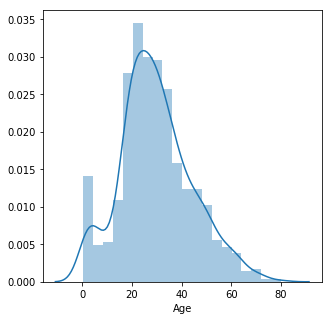

In [135]:
data.columns
data.isnull().sum()
#data.Age.plot.box()
len(data[data.Age >70][data.Survived==0])
x = data.Age
x = x.dropna()
plt.figure(figsize=(5,5))
sns.distplot(x)
age_log = np.log(x)
#sns.distplot(age_log)


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
29.69911764705882


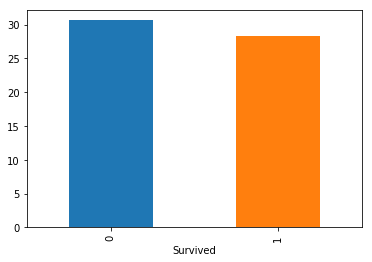

In [136]:
data.groupby('Survived')['Age'].mean().plot.bar()
data.columns
print(data.groupby('Survived')['Age'].mean())
print(np.mean(data.Age))

data.Age.fillna(np.mean(data.Age), inplace=True)



In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Age_category,fare_split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20.0, 30.0]","(0, 100]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30.0, 40.0]","(0, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20.0, 30.0]","(0, 100]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30.0, 40.0]","(0, 100]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30.0, 40.0]","(0, 100]"


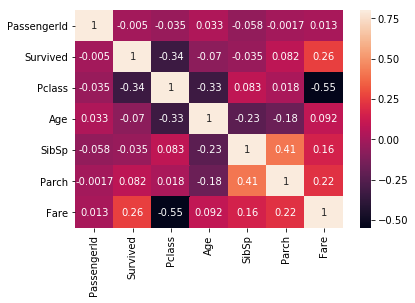

In [137]:

X = data.drop('Name', axis = 1)
sns.heatmap(X.corr(),annot = True, vmax=0.8)


In [138]:
Y = data.Survived
df = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age_category', 'fare_split', 'Survived']
X = data.drop(df, axis =1)
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zimmerman,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
data_test.head()
x = data_test.Name.apply(lambda x: x.split(',')[1])
y_ = []
for i in range(len(x)):
    y_.append(x[i].split('.')[0])

data_test['title'] = pd.DataFrame(y_)
x_ = data_test.Name.apply(lambda x: x.split(',')[0])
data_test['surname'] = x_

df_test = ['Name', 'Ticket','Cabin', 'PassengerId']
data_test= data_test.drop(df_test, axis=1)


In [142]:
data_test.Age.fillna(data_test.Age.mean(), inplace = True)
print(data_test.head())
data_test.isna().sum()



   Pclass     Sex   Age  SibSp  Parch     Fare Embarked title   surname
0       3    male  34.5      0      0   7.8292        Q    Mr     Kelly
1       3  female  47.0      1      0   7.0000        S   Mrs    Wilkes
2       2    male  62.0      0      0   9.6875        Q    Mr     Myles
3       3    male  27.0      0      0   8.6625        S    Mr      Wirz
4       3  female  22.0      1      1  12.2875        S   Mrs  Hirvonen


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
title       0
surname     0
dtype: int64

In [143]:
#fare has a correlation coeff of .22 wit parch and -0.55 with pclass

print(data_test[data_test.Fare.isna()])

print(data.groupby('Parch')['Fare'].mean())
print(data.groupby('SibSp')['Fare'].mean())
print(data[data.Age>50][data.Sex=="male"].Fare.mean())
print(data.groupby('Sex')['Fare'].mean())
print(data.groupby('Pclass')['Fare'].mean())
# the guy belongs to pclass 3 -- mean fare is approx 13.6 and according to parch, fare is 25 approx. 

data_test.Fare.fillna(25,inplace=True)
test = pd.get_dummies(data_test)

     Pclass   Sex   Age  SibSp  Parch  Fare Embarked title surname
152       3  male  60.5      0      0   NaN        S    Mr  Storey
Parch
0    25.586774
1    46.778180
2    64.337604
3    25.951660
4    84.968750
5    32.550000
6    46.900000
Name: Fare, dtype: float64
SibSp
0    25.692028
1    44.147370
2    51.753718
3    68.908862
4    31.855556
5    46.900000
8    69.550000
Name: Fare, dtype: float64
35.103193617021276
Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [328]:
sub_file = pd.read_csv("/home/engineer/Kaggle_dataset/Titanic/gender_submission.csv") 
test_ = pd.read_csv("/home/engineer/Kaggle_dataset/Titanic/test.csv")

sub_file['PassengerId'] = test_.PassengerId
sub_file.Survived = prediction
pd.DataFrame(sub_file, columns=['PassengerId','Survived']).to_csv('/home/engineer/Kaggle_dataset/Titanic/test_titanic.csv')


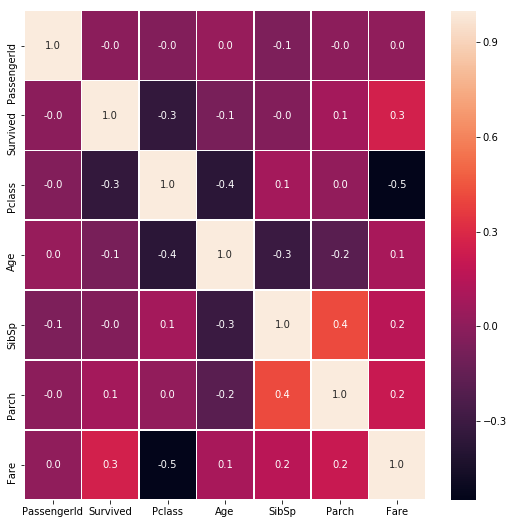

In [165]:
f,ax = plt.subplots(figsize=(9, 9))

sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='0.1f', ax =ax)




In [120]:
from collections import Counter
x = data.Name.apply(lambda x: x.split(',')[1])
y = []
for i in range(len(x)):
    y.append(x[i].split('.')[0])

count = Counter(y)
print(count)



Counter({' Mr': 517, ' Miss': 182, ' Mrs': 125, ' Master': 40, ' Dr': 7, ' Rev': 6, ' Major': 2, ' Mlle': 2, ' Col': 2, ' Don': 1, ' Mme': 1, ' Ms': 1, ' Lady': 1, ' Sir': 1, ' Capt': 1, ' the Countess': 1, ' Jonkheer': 1})


In [121]:
#out of 7 doctors, one is female
for i in range(len(y)):
    if(y[i]==' Dr' and data.Sex[i]=='female'):
        print(data.Name[i])

Leader, Dr. Alice (Farnham)


In [122]:
data['title'] = pd.DataFrame(y)

In [124]:
x_ = data.Name.apply(lambda x: x.split(',')[0])
len(x_)
len(x_.unique())
#x_.value_counts()

Andersson        9
Sage             7
Carter           6
Goodwin          6
Skoog            6
Panula           6
Johnson          6
Rice             5
Palsson          4
Hart             4
Asplund          4
Lefebre          4
Williams         4
Harper           4
Baclini          4
Kelly            4
Brown            4
Fortune          4
Smith            4
Harris           4
Ford             4
Gustafsson       4
Meyer            3
Flynn            3
Davies           3
Jensen           3
Johansson        3
Navratil         3
Hoyt             3
Richards         3
                ..
Drazenoic        1
Sedgwick         1
McNamee          1
Nenkoff          1
Duran y More     1
Torber           1
Peuchen          1
McCormack        1
Douglas          1
Ayoub            1
Shutes           1
Givard           1
Emir             1
Meanwell         1
Drew             1
Longley          1
Hunt             1
Pickard          1
Stead            1
Canavan          1
Sirota           1
Roebling    

In [125]:
data['surname'] = x_

In [154]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [155]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [156]:
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [159]:
print(data.title.value_counts())
data[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='title', ascending=False)

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Jonkheer          1
 Capt              1
 Sir               1
 the Countess      1
 Don               1
 Lady              1
 Ms                1
 Mme               1
Name: title, dtype: int64


,title,Survived
16,the Countess,1.000000
15,Sir,1.000000
14,Rev,0.000000
13,Ms,1.000000
12,Mrs,0.792000
11,Mr,0.156673
10,Mme,1.000000
9,Mlle,1.000000
8,Miss,0.697802
7,Master,0.575000


In [161]:
title_sex = pd.crosstab(data.title,data.Sex)
#title_sex.div(title_sex.sum(),axis=1).plot(kind='bar', stacked=True)
print(title_sex)

Sex            female  male
title                      
 Capt               0     1
 Col                0     2
 Don                0     1
 Dr                 1     6
 Jonkheer           0     1
 Lady               1     0
 Major              0     2
 Master             0    40
 Miss             182     0
 Mlle               2     0
 Mme                1     0
 Mr                 0   517
 Mrs              125     0
 Ms                 1     0
 Rev                0     6
 Sir                0     1
 the Countess       1     0


In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#pred_test = model.predict(test)

In [164]:

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=0.011)
model.fit(x_train, y_train)

pred = model.predict(x_test)
accuracy_score(y_test,pred)


0.8100558659217877

In [165]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)
# make predictions for test data
pred_ = model_xg.predict(x_test)
print(accuracy_score(y_test,pred_))

#prediction = model_xg.predict(test)

0.8044692737430168


/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [166]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear", C =0.8)

svc.fit(x_train, y_train)

pred = svc.predict(x_test)
accuracy_score(y_test,pred)
#pred_ = svc.predict(test)

0.8547486033519553

In [ ]:
'''using surnames as features does improve the validation accuracy but same surnames don't exist in the test dataset. 
Therefore,  surname as a feature needs to be dropped and then test the model on the test set. Till then the prediction
function is commented. 
Some other features need to be computed
'''